In [1]:
import numpy as np
from scipy.sparse.linalg import svds
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

import pandas as pd

import gensim
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
embeddings = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True) 

FileNotFoundError: ignored

In [ ]:
embeddings.vector_size

300

In [ ]:
def get_embedding(word):
    return embeddings[word]/np.linalg.norm(embeddings[word])

In [ ]:
v1 = get_embedding('her')
v2 = get_embedding('him')
v = v1 - v2

In [ ]:
words_part_d = ['boy', 'girl', 'brother', 'sister', 'king', 'queen', 'he', 'she', 'john', 'mary', "man", "woman", "men", "women", "him", "her","grandfather", "grandmother","wall","tree","sky"]
projections = [ np.dot(get_embedding(w), v) for w in words_part_d ]

In [ ]:
for i in range(len(words_part_d)):
    print(words_part_d[i], projections[i])

boy -0.09744068
girl 0.17116171
brother -0.16872066
sister 0.22305247
king -0.18335846
queen 0.22377278
he -0.283926
she 0.39726764
john -0.069021866
mary 0.13073638
man -0.18897212
woman 0.2209714
men -0.08920882
women 0.22242141
him -0.51378083
her 0.51378083
grandfather -0.11243805
grandmother 0.13369119
wall -0.12286216
tree -0.023387928
sky -0.04408122


In [ ]:
words_part_d2 = ['leader', 'nurse', 'doctor', 'pilot', 'teacher', 'engineer', 'carpenter', 'driver', 'professor','judge', 'singer', 'chef', 'accountant', 'clergy','salesperson', 'designer', 'soldier', 'housekeeper', 'fighter','police','astronaut','plumber', "secretary", "manager", "therapist", "writer", "farmer", "architect", "dressmaker", "homemaker", "gardener", "firefighter", "trader", "scientist","shooter"]

In [ ]:
def print_original_projections(word_list, v):
    projections = [ (w, np.dot(get_embedding(w), v)) for w in word_list ]
    projections.sort(key=lambda x:x[1])
    for p in projections:
        print(p[0], p[1])
    
    ps = [ a[1] for a in projections]
    print("Variance:",np.var(ps))

def print_projections(word_list, v, embeddings):
    projections = [ (w, np.dot(embeddings[w], v)) for w in word_list ]
    projections.sort(key=lambda x:x[1])
    for p in projections:
        print(p[0], p[1])
    
    ps = [ a[1] for a in projections]
    print("Variance:",np.var(ps))

In [ ]:
print_original_projections(words_part_d2, v)

leader -0.14819138
fighter -0.11125871
shooter -0.09052012
clergy -0.082308695
doctor -0.078965686
manager -0.07199802
architect -0.065194875
plumber -0.06510356
engineer -0.054520488
driver -0.04791988
trader -0.047388367
carpenter -0.039758757
judge -0.030959819
police -0.025292646
farmer -0.009981964
writer 0.0008649267
soldier 0.0031656474
pilot 0.010155176
secretary 0.0149815865
scientist 0.021676268
firefighter 0.026661104
accountant 0.03398322
salesperson 0.041394275
professor 0.043320153
chef 0.04665868
astronaut 0.07401569
therapist 0.083251916
gardener 0.08771912
teacher 0.09447907
singer 0.1326055
housekeeper 0.13424286
designer 0.1612786
nurse 0.18665528
dressmaker 0.22601292
homemaker 0.29938358
Variance: 0.009669786


In [ ]:
D_1 = get_embedding('she') - get_embedding('he')
D_2 = get_embedding('woman') - get_embedding('man')
D_3 = get_embedding('her') - get_embedding('him')
D_4 = get_embedding('women') - get_embedding('men')
D_5 = get_embedding('female') - get_embedding('male')
D_6 = get_embedding('herself') - get_embedding('himself')
D_7 = get_embedding('girl') - get_embedding('boy')
D_8 = get_embedding('mother') - get_embedding('father')
D_9 = get_embedding('daughter') - get_embedding('son')

D = [D_1, D_2, D_3, D_4, D_5,D_6, D_7, D_8, D_9]

In [ ]:
E_1 = ("she", "he")
E_2 = ("woman", "man")
E_3 = ("her", "him")
E_4 = ("women", "men")
E_5 = ("female", "male")
E_6 = ("herself", "himself")
E_7 = ("girl", "boy")
E_8 = ("mother", "father")
E_9 = ("daughter", "son")
E = [E_1, E_2, E_3, E_4, E_5, E_6, E_7, E_8, E_9]

In [ ]:
pca = PCA(n_components=9)
pca.fit(D)

PCA(n_components=9)

In [ ]:
ratio = pca.explained_variance_ratio_
ratio

array([3.93027059e-01, 1.82305102e-01, 1.31668940e-01, 9.55571926e-02,
       7.61819579e-02, 5.98612122e-02, 3.47270180e-02, 2.66715179e-02,
       8.35832369e-33])

In [ ]:
ratio[0]+ratio[1]+ratio[2]+ratio[3]

0.802558294006121

In [ ]:
B = [pca.components_[0], pca.components_[1], pca.components_[2],  pca.components_[3]]

In [ ]:
def calculate_vb(v, B):
    v_b = np.zeros(B[0].size)
    for b in B:
        v_b += (np.dot(v, b)) * b
    return v_b

In [ ]:
new_embs = dict()

for w in words_part_d2:
    old_emb = get_embedding(w) #embeddings[w] 
    
    vector = old_emb - calculate_vb(old_emb, B)
    new_emb = (vector)/np.linalg.norm(vector)
    new_embs[w] = new_emb

In [ ]:
print_projections(words_part_d2, v, new_embs)

carpenter -0.08746418779772805
engineer -0.06553996720213476
architect -0.05521736020980563
plumber -0.051086211319805945
firefighter -0.04986672209586168
farmer -0.03651670522379093
police -0.03480592492391453
driver -0.03209515392603208
trader -0.02956020211504652
chef -0.027635020494126916
gardener -0.02293137393747674
pilot -0.02016577956469696
fighter -0.015031886695172898
manager -0.010388134395389886
soldier -0.010126714019039446
professor -0.0090956322095646
scientist -0.004912186745433526
shooter -0.00401308991285192
accountant -0.002729950300803974
doctor 0.0014375098330559298
writer 0.010072486444821012
clergy 0.010351344533189307
leader 0.01042872064403335
singer 0.018959723159912657
secretary 0.02175249202851428
astronaut 0.024290868649358952
designer 0.02654014912601993
judge 0.027687148641466656
salesperson 0.029379634390251617
therapist 0.03507286360987232
teacher 0.04232220882468639
housekeeper 0.047556072712211614
dressmaker 0.06271148166766677
homemaker 0.07685974460

In [ ]:
def equalize_a_set(E):
    mu = np.zeros(get_embedding(E[0]).size)
    for w in E:
        e = get_embedding(w)
        mu += e/len(E)
            
    v1 = mu - calculate_vb(mu, B)
    
    for w in E:
        e = get_embedding(w)
        vec = calculate_vb(e, B)
        new_embs[w] = v1 + np.sqrt(1-(np.linalg.norm(v1))**2) * vec/np.linalg.norm(vec)

In [ ]:
for E_curr in E:
    equalize_a_set(E_curr)

In [ ]:
new_v = new_embs['her'] - new_embs['him']
print_projections(words_part_d2, new_v, new_embs)

nurse -1.6653345369377348e-16
police -1.249000902703301e-16
firefighter -1.214306433183765e-16
homemaker -1.0408340855860843e-16
housekeeper -9.020562075079397e-17
dressmaker -9.020562075079397e-17
gardener -7.28583859910259e-17
salesperson -6.938893903907228e-17
teacher -6.245004513516506e-17
driver -5.898059818321144e-17
singer -5.551115123125783e-17
soldier -5.551115123125783e-17
judge -4.85722573273506e-17
therapist -4.85722573273506e-17
pilot -3.642919299551295e-17
manager -3.642919299551295e-17
shooter -3.469446951953614e-17
chef -3.2959746043559335e-17
accountant -6.938893903907228e-18
designer -3.469446951953614e-18
clergy 3.469446951953614e-18
trader 3.469446951953614e-18
professor 1.0408340855860843e-17
astronaut 1.734723475976807e-17
doctor 2.6020852139652106e-17
fighter 3.122502256758253e-17
scientist 3.122502256758253e-17
plumber 3.8163916471489756e-17
farmer 4.163336342344337e-17
carpenter 4.85722573273506e-17
writer 4.85722573273506e-17
engineer 5.898059818321144e-17
sec

In [ ]:
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7097 sha256=9fc9c5d635fc16116e4a225c3ea4fcd4bba221ebdaf595046c525c09aaadaaf9
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [ ]:
def turnintoplot(text):
  lines = text.split('\n')
  words = []
  vals = []
  for l in lines:
    l = l.split()
    if len(l) < 2:
      continue
    words.append(l[0].strip())
    vals.append(float(l[1]))
  
  fig, ax = plt.subplots(figsize=(8,3))
  plt.scatter(vals, [0] * len(vals), s=0)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  plt.yticks([], "")
  texts = [plt.text(vals[i], 0, words[i], ha='center', va='center') for i in range(len(vals))]
  adjust_text(texts)

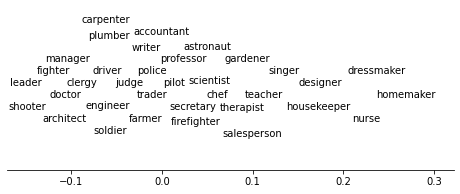

In [ ]:
text = '''leader -0.14819138
fighter -0.11125871
shooter -0.09052012
clergy -0.082308695
doctor -0.078965686
manager -0.07199802
architect -0.065194875
plumber -0.06510356
engineer -0.054520488
driver -0.04791988
trader -0.047388367
carpenter -0.039758757
judge -0.030959819
police -0.025292646
farmer -0.009981964
writer 0.0008649267
soldier 0.0031656474
pilot 0.010155176
secretary 0.0149815865
scientist 0.021676268
firefighter 0.026661104
accountant 0.03398322
salesperson 0.041394275
professor 0.043320153
chef 0.04665868
astronaut 0.07401569
therapist 0.083251916
gardener 0.08771912
teacher 0.09447907
singer 0.1326055
housekeeper 0.13424286
designer 0.1612786
nurse 0.18665528
dressmaker 0.22601292
homemaker 0.29938358'''
turnintoplot(text)

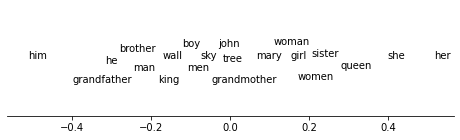

In [ ]:
text = '''boy -0.09744068
girl 0.17116171
brother -0.16872066
sister 0.22305247
king -0.18335846
queen 0.22377278
he -0.283926
she 0.39726764
john -0.069021866
mary 0.13073638
man -0.18897212
woman 0.2209714
men -0.08920882
women 0.22242141
him -0.51378083
her 0.51378083
grandfather -0.11243805
grandmother 0.13369119
wall -0.12286216
tree -0.023387928
sky -0.04408122'''
turnintoplot(text)

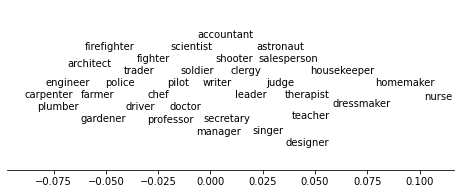

In [ ]:
text='''carpenter -0.08746418779772805
engineer -0.06553996720213476
architect -0.05521736020980563
plumber -0.051086211319805945
firefighter -0.04986672209586168
farmer -0.03651670522379093
police -0.03480592492391453
driver -0.03209515392603208
trader -0.02956020211504652
chef -0.027635020494126916
gardener -0.02293137393747674
pilot -0.02016577956469696
fighter -0.015031886695172898
manager -0.010388134395389886
soldier -0.010126714019039446
professor -0.0090956322095646
scientist -0.004912186745433526
shooter -0.00401308991285192
accountant -0.002729950300803974
doctor 0.0014375098330559298
writer 0.010072486444821012
clergy 0.010351344533189307
leader 0.01042872064403335
singer 0.018959723159912657
secretary 0.02175249202851428
astronaut 0.024290868649358952
designer 0.02654014912601993
judge 0.027687148641466656
salesperson 0.029379634390251617
therapist 0.03507286360987232
teacher 0.04232220882468639
housekeeper 0.047556072712211614
dressmaker 0.06271148166766677
homemaker 0.07685974460726142
nurse 0.10654211571317623'''
turnintoplot(text)

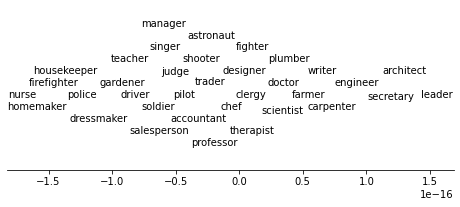

In [ ]:
text='''
nurse -1.6653345369377348e-16
police -1.249000902703301e-16
firefighter -1.214306433183765e-16
homemaker -1.0408340855860843e-16
housekeeper -9.020562075079397e-17
dressmaker -9.020562075079397e-17
gardener -7.28583859910259e-17
salesperson -6.938893903907228e-17
teacher -6.245004513516506e-17
driver -5.898059818321144e-17
singer -5.551115123125783e-17
soldier -5.551115123125783e-17
judge -4.85722573273506e-17
therapist -4.85722573273506e-17
pilot -3.642919299551295e-17
manager -3.642919299551295e-17
shooter -3.469446951953614e-17
chef -3.2959746043559335e-17
accountant -6.938893903907228e-18
designer -3.469446951953614e-18
clergy 3.469446951953614e-18
trader 3.469446951953614e-18
professor 1.0408340855860843e-17
astronaut 1.734723475976807e-17
doctor 2.6020852139652106e-17
fighter 3.122502256758253e-17
scientist 3.122502256758253e-17
plumber 3.8163916471489756e-17
farmer 4.163336342344337e-17
carpenter 4.85722573273506e-17
writer 4.85722573273506e-17
engineer 5.898059818321144e-17
secretary 7.632783294297951e-17
architect 1.0755285551056204e-16
leader 1.5265566588595902e-16'''
turnintoplot(text)